In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("houseSmallData.csv")
train = data.iloc[0:20,:]

In [6]:
train

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
# Investigate Sale Price
train["SalePrice"]

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

<AxesSubplot:ylabel='Frequency'>

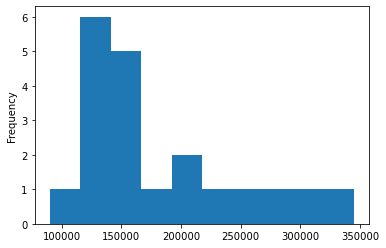

In [13]:
train["SalePrice"].plot(kind="hist")

In [14]:
numeric = train.select_dtypes(include=[np.number])

In [16]:
numeric

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,61,0,0,0,0,NaN,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,0,0,NaN,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,42,0,0,0,0,NaN,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,35,272,0,0,0,NaN,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,84,0,0,0,0,NaN,0,12,2008,250000
5,5,6,50,85.0,14115,5,5,1993,1995,0.0,...,30,0,320,0,0,NaN,700,10,2009,143000
6,6,7,20,75.0,10084,8,5,2004,2005,186.0,...,57,0,0,0,0,NaN,0,8,2007,307000
7,7,8,60,NaN,10382,7,6,1973,1973,240.0,...,204,228,0,0,0,NaN,350,11,2009,200000
8,8,9,50,51.0,6120,7,5,1931,1950,0.0,...,0,205,0,0,0,NaN,0,4,2008,129900
9,9,10,190,50.0,7420,5,6,1939,1950,0.0,...,4,0,0,0,0,NaN,0,1,2008,118000


In [33]:
corr = numeric.corr()
important_columns = corr["SalePrice"].sort_values(ascending=False)[1:3].index
important_columns

Index(['OverallQual', 'MasVnrArea'], dtype='object')

In [34]:
X = train[important_columns]
Y = train["SalePrice"]

In [32]:
Y

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

In [35]:
X

,OverallQual,MasVnrArea
0,7,196.0
1,6,0.0
2,7,162.0
3,7,0.0
4,8,350.0
5,5,0.0
6,8,186.0
7,7,240.0
8,7,0.0
9,5,0.0


In [39]:
# Build Linear Regression
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)


array([220817.44326658, 148523.04657142, 212834.56491667, 174798.49748472,
       283250.6372942 , 122247.59565813, 244744.98878284, 231148.22701353,
       174798.49748472, 122247.59565813, 122247.59565813, 294499.49366648,
       122247.59565813, 246644.40263396, 198298.64098854, 174798.49748472,
       190785.34371803,  95972.14474483, 122247.59565813, 122247.59565813])

In [40]:
# How good is the model?
model.score(X,Y)

0.7501993255220817

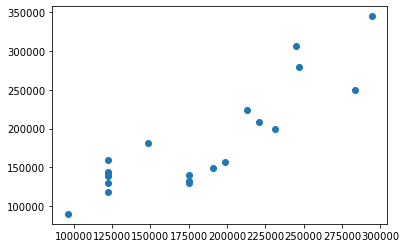

In [47]:
# Scatter of Predictions
plt.scatter(predictions,Y)